## **Exercise 4.2**


Do not adjust the cell below

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools


# Generate the Initial bitstring and the goal string
def generate_bitstring(bitstring, goalstring = False):
  # All ones
  if goalstring:
    for i in range(0,string_length):
      bitstring += str(1)
  # Randomly add a 1 or a 0
  else:
    for i in range(0,string_length):
      bitstring += str(random.randint(0, 1))
  return bitstring

def selection_step(bitstring,goalstring,fitness, string_length, exercise_4_3):
  for index in range (0, max_iterations):
    # Copy the bitstring
    bitstring_copy = bitstring
    for i in range(0,string_length):
      # Alter the bitstring with probability mu
      if random.random() <= mu:
        # Flip 0 to 1 and 1 to 0
        if int(bitstring_copy[i]) == 0:
          bitstring_copy = bitstring_copy[:i] + str(1) + bitstring_copy[i+1:]
        elif int(bitstring_copy[i]) == 1:
          bitstring_copy = bitstring_copy[:i] + str(0) + bitstring_copy[i+1:]

    # Calculate similarity between the original bitstring and the copy to the goal string
    if similarity(bitstring_copy,goalstring, string_length) > similarity(bitstring,goalstring, string_length):
      # Replace bitstring with copy if the similarity between the copy and the goalstring is higher
      bitstring = bitstring_copy

    # Replace bitstring always with copy for exercise  4.2.3
    if exercise_4_3:
      bitstring = bitstring_copy

    # Append the best_fitness to the array
    fitness.append(similarity(bitstring,goalstring, string_length))
  return fitness    
  

def similarity(bitstring, goalstring, string_length):
  similarity = 0
  for i in range(0,len(bitstring)):
    if bitstring[i] == goalstring[i]:
      similarity += 1/string_length*100
  return similarity


The parameters in the cell below have been sampled directly from assignment. To simulate the behaviour of exercise 4.2.1, the exercise_4_3 flag should be set to false and the range should be set to 1 to simulate a single run without changing the other parameters. For exercise 4.2.2, the exercise_4_3 flag should remain false and the range should be set to 10 to simulate 10 runs. The rest of the parameters should remain the same. For exercise 4.2.3 the exercise_4_3 flag should be set to True while keeping everything else constant.

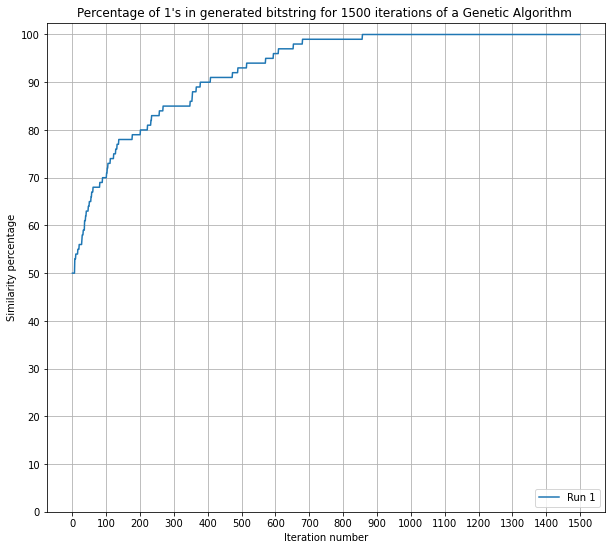

In [ ]:
# Length of all generated strings
string_length = 100

# Mutation probability
mu = 1/string_length

# Maximum number of Iterations
max_iterations = 1500

# Switch for exercise 4.2.3
exercise_4_3 = False

# Target String
goal_sequence = generate_bitstring("",True)

# Random initial bitstring
bitstring = generate_bitstring("")

plt.figure(figsize=(10,9))

# Edit the range value to change the number of runs for 4.2.2 -4.2.3
for i in range(1):
  fitness_array = selection_step(bitstring, goal_sequence, [], string_length, exercise_4_3)
  plt.plot(range(0,max_iterations),fitness_array, label = "Run " + str(i+1))

plt.xlabel("Iteration number")
plt.title("Percentage of 1's in generated bitstring for " + str(max_iterations) + " iterations of a Genetic Algorithm ")
plt.yticks(np.arange(0, 110, 10))
plt.xticks(np.arange(0,1600,100))
plt.legend(loc = "lower right")
plt.ylabel("Similarity percentage")
plt.grid()
plt.show()

## **Exercise 4.3**

The cell below reads the input tsp files, do not adjust

In [ ]:
# Append the coordinates to a list 
cities = open('file-tsp.txt', 'r')
coordinates_str = []

for city in cities:
    city = city.strip('\n').strip(' ').split()
    coordinates_str.append(city)
    
#print(coordinates_str)

coordinates = []
for coordinate in coordinates_str:
    xy = []
    for c in coordinate:
        c = float(c)
        xy.append(c)
    coordinates.append(xy)
        
coordinates = np.asarray(coordinates)        
cities = list(range(0,len(coordinates)))

Do not adjust the cell below. It represents the memetic algorithm with two-opt local search

In [ ]:
def fitness_calculation(locations):

  totaldistance = 0

  # Calculate the total distance for a route
  for i in range (1, len(locations)):
    # Use euclidean distance
    totaldistance += math.sqrt((locations[i][0] -locations[i-1][0])**2 + (locations[i][1] -locations[i-1][1])**2)

  return totaldistance

def two_opt(cities, locations):
  # Takes a random order of cities and a fixed order of locations
  # Index the locations by the order of cities
  locations = locations[cities]
  route = fitness_calculation(locations)
  best_config = cities

  # Generate a list of indices to be swapped
  indices = list(range(0,len(cities)))

  # Generate all possible swaps within the list of indices
  swaps = list(itertools.combinations(indices, 2))

  for swap in swaps:
    cities_copy = list(cities)

    # Swap the two cities belonging to the indices
    cities_copy[swap[0]], cities_copy[swap[1]] = cities_copy[swap[1]], cities_copy[swap[0]]
    
    # Index the copy of the locations by the new cities
    locations_copy = locations[cities_copy]

    # Calulcate the route for the new configuration
    new_route = fitness_calculation(locations_copy) 

    # If the new route turns out to be shorter, change the old route to the new route and change the old city configuration to the new one as well
    if new_route < route:
      route = new_route
      best_config = list(cities_copy)

  cities = best_config

  # Return the local optimal route and city configuration
  # print(route)
  return route, cities

def initialize_orderings(cities, N):

  candidate_population = []

  # Create N candidates
  for i in range(N):

    # Take a copy, shuffle, and add to population
    cities_copy = list(cities)
    random.shuffle(cities_copy)

    candidate_population.append(cities_copy)
  
  return candidate_population

def perform_simulation(max_iterations, cities, locations, N):

  candidate_population = initialize_orderings(cities, N)

  for i in range(max_iterations):

    global_optimal_route = 10000 #Could also be +inf but 10000 is enough for these experiments
    global_optimal_config = None

    for index in range (0, max_iterations):
      
      # Perform two_opt search for the entire candidate population
      for i, candidate in enumerate(candidate_population):

        # Retrieve the found optimal configuration and route distance
        route, city_configuration = two_opt(candidate, locations)
        candidate_population[i] = city_configuration
        
        # If the route distance happens to be smaller than the global optimum, set the configuration and route as the new optima
        if route < global_optimal_route:
          global_optimal_route = route
          global_optimal_config = city_configuration

      print(global_optimal_route)


The parameters in this cell can be adjusted freely. 

In [ ]:
# Maximum number of iterations
g_max = 1500

# Size of candidate population
N = 100

perform_simulation(g_max, cities, coordinates, N)

381.04588583236045
348.8127700082357
334.06753727394204
312.449653879507
295.69279999429295
272.25577970215693
265.7512481135398
265.7512481135398
253.81564393525264
249.1879827971316
249.1879827971316
249.1879827971316
243.84536487636007
243.84536487636007
233.00598167505677
225.2705165662332
225.2705165662332
225.2705165662332
225.2705165662332
224.81880573106105
224.81880573106105
220.8114958090379
215.04261132111205
214.85637499919085
212.26525165289215
211.88909828209916
211.37925952316957
211.37925952316957
207.92845477621577
205.78795843230358
202.2803298978317
202.2803298978317
202.2803298978317
199.0192272956129
199.0192272956129
199.0192272956129
199.0192272956129
199.0192272956129
199.0192272956129
199.0192272956129
199.0192272956129
193.7404737525647
193.7404737525647
187.2682535592906
187.2682535592906
187.2682535592906
187.2682535592906
187.2682535592906
186.18943470286717
186.18943470286717
183.38505971269976
183.38505971269976
183.38505971269976
183.38505971269976
175.7

## **Exercise 4.4**

Do not adjust the cell below

In [ ]:

def fitness_calculation(candidate_string, target_string):
  score = 0
  # Check how many characters are equal (same place same character) between the candidate and target string
  for i in range(len(target_string)): 
    if target_string[i] == candidate_string[i]:
      score += 1
  # Return the fraction of correct characters
  return score/len(target_string)


def initialize_random_strings(alphabet,target_string, population_size):
  population = []
  # Generate N random strings
  for index in range(population_size):
    random_string = ""

    # Generate strings with the size of the target string
    for i in range(len(target_string)):

      # Choose a random character from the alphabet
      random_string += alphabet[random.randint(0, len(alphabet)-1)]

    # Add string to the population
    population.append(random_string)

  return population

def crossover(parent_1, parent_2, p_c):

  if random.random() <= p_c:
    # Grab a random crossover point
    crossover_point = random.randint(0, len(parent_1)-1)

    # Everything from parent 1 before the crossover point is replaced by parent 2
    # and everything from parent 2 after the crossover point is replaced by parent 1
    for i in range(len(parent_1)):
      if i < crossover_point:
        parent_1 = parent_1[:i] + parent_2[i] + parent_1[i+1:]
      elif i >= crossover_point:
        parent_2 = parent_2[:i] + parent_1[i] + parent_2[i+1:]
    
  return parent_1, parent_2
  

# Mutate every letter from parent 1 with a probability mu
def mutate(parent_1, mu, alphabet):
    parent_list = list(parent_1)
    for i in range(len(parent_1)):
        if random.random() <= mu:
            # Replace the letter with a random one from the alphabet
            random_letter = alphabet[random.randint(0, len(alphabet)-1)]
            parent_list[i] = random_letter
    return ''.join(parent_list)


def perform_simulation(candidate_population,target_string, K, mu, alphabet, p_c, g_max):

  # Keep track of time (-1 because then we start at 0)
  t = -1
  
  # Run the simulation until the target_string is matched or 30000 simulation steps have passed
  while True:

    # If g_max steps have passed we abort the execution because it takes too long
    if t > g_max-1:
      return None, t
    
    # Increase the iteration step
    t += 1

    fitnesses = []
    
    # Calculate the fitnesses for the entire candidate population
    for candidate in candidate_population:
      fitness = fitness_calculation(candidate,target_string)

      # Exit the simulation if the target has been reached
      if fitness == 1.0:
        return candidate, t
      else:
        fitnesses.append(fitness_calculation(candidate,target_string))

    # Initialize the population for the children
    children_population = []

    # Tournament sampling
    while len(children_population) < N:

      sampled_parents = []

      # Sampling two random parents
      for index in range(2):

        K_sampled_parents = []
        K_sampled_fitnesses = []

        # Sample K parents and keep the fittest
        for i in range(K):

          # Grab two random parents and their fitnesses
          random_index = random.randint(0, len(candidate_population)-1)
          K_sampled_fitnesses.append(fitnesses[random_index])
          K_sampled_parents.append(candidate_population[random_index])

        # Obtain the index of the fittest parent and add this parent to the sampled parents
        K_sampled_fitnesses = np.array(K_sampled_fitnesses)
        sampled_parents.append(K_sampled_parents[np.argmax(K_sampled_fitnesses)])
    

    # Generate the children produced by the two parents
      mutated_parent_1 = mutate(sampled_parents[0],mu,alphabet)
      mutated_parent_2 = mutate(sampled_parents[1],mu,alphabet)

      child_1, child_2 = crossover(mutated_parent_1, mutated_parent_2, p_c)

      # Append the children to the children population
      children_population.extend([child_1,child_2])
    
    # When 1000 children are created, overwrite the candidate population with the children
    candidate_population = children_population


# Exercise 4.4.1 - 4.4.3


The parameters in this cell can be adjusted freely. To simulate the behaviour required for exercise 4.4.1 we recommend using N = 1000, p_c = 1, mu = 0.01, K = 2 and a g_max value of more than 100. The cell will perform 20 runs and plot the number of iterations required to match the target_string for each of the runs along with the average. For exercise 4.2.2, the value of the mu parameter should be set to 0 while keeping all other parameters constant and for exercise 4.4.3, the value of the mu parameter should be set to 0.1 while keeping all other parameters constant.

In [ ]:
# Alphabet
alphabet = "abcdefghijklmnopqrstuvwxyz "

# Number of random strings
N = 1000

# Crossover probability
p_c = 1

# Mutation rate
mu = 0.01

# Number of candidates for tournament sampling
K = 2

# Target String (must be between 10 and 20 characters)
target_string = "helloworld iamluuk"
assert len(target_string) <= 20 and len(target_string) >= 10

# Maximum number of iterations
g_max = 1000

# Array to store the times
times = []

for i in range(20):
  pop = initialize_random_strings(alphabet,target_string, N)
  winning_string, time = perform_simulation(pop,target_string, K, mu, alphabet, p_c, g_max)
  times.append(time)

mean = sum(times)/len(times)
median = np.median(np.array(times))

plt.figure(figsize=(10,9))
plt.plot(range(1,21), times)
plt.axhline(y=mean, color='r', linestyle='-', label = "mean", ls='--')
plt.axhline(y=median, color='g', linestyle='-', label = "median", ls='--')
plt.legend(loc = "lower right", title='Mean = ' + str(mean) + "\nMedian = " + str(median))
plt.title("GA converging times for 20 runs with K = " + str(K) + " and mu = " + str(mu))
plt.ylabel("Number of iterations T(finish)")
plt.xlabel("Run #")
plt.xticks(np.arange(1,21,1))
plt.grid()
plt.show()

plt.figure(figsize=(10,9))
# The line below turns the scale for the boxplot into a logarithmic scale, comment this line for runs that use a mu-value that always leads to fast convergence
plt.yscale("log")
plt.boxplot(times, labels = ["mu = " + str(mu)], showmeans = True)
plt.legend(loc = "lower right", title='Mean = ' + str(mean) + "\nMedian = " + str(median))
plt.title("Boxplot of the GA run times for 20 runs with K = " + str(K) + " and mu = " + str(mu))
plt.ylabel("Number of iterations T(finish) ")
plt.show()



# Exercise 4.4.4 - 4.4.5

The parameters in this cell can be adjusted freely. To simulate the behaviour required for exercise 4.4.4 we recommend using N = 1000, p_c = 1, mu = 0.01, K = 2, a g_max value of 1000 (due to exploding computation times) and N_m can be tuned freely. The cell will perform N_m runs and plot the number of iterations required to match the target_string for N_m mu values on the interval [0,1]. For exercise 4.4.5, the K value should be adjusted to 5 while keeping all other parameters constant.

In [ ]:
# Number of mu's to be tried
N_m = 1000

# Alphabet
alphabet = "abcdefghijklmnopqrstuvwxyz "

# Number of random strings
N = 1000

# Crossover probability
p_c = 1

# Number of candidates for tournament sampling
K = 5

# Target String (must be between 10 and 20 characters)
target_string = "helloworld iamluuk"
assert len(target_string) <= 20 and len(target_string) >= 10

# Array of mu values
mu_array = np.arange(0,0.2,1/N_m)
mu_array = mu_array.tolist()

# Array to store the times
times = []

# Maximum number of iterations
g_max = 200

for count, mu in enumerate(mu_array):

  # Logs completion
  if count % int((0.1*len(mu_array))) == 0:
    print(str(int(count/int(0.1*len(mu_array))*10)) + "% complete")


  pop = initialize_random_strings(alphabet,target_string, N)
  _, time = perform_simulation(pop,target_string, K, mu, alphabet, p_c, g_max)
  times.append(time)

mean = sum(times)/len(times)
std = np.std(np.array(times))
median = np.median(np.array(times))
print("Standard deviation: " + str(std))


plt.figure(figsize=(20,9))
plt.plot(mu_array, times)
plt.axhline(y=mean, color='r', linestyle='-', label = "mean", ls='--')
plt.axhline(y=median, color='g', linestyle='-', label = "median", ls='--')
plt.legend(loc = "lower right", title='Mean = ' + str(mean) + "\nMedian = " + str(median))
plt.title("GA converging times for " + str(N_m) + " runs with K = " + str(K) + " and varying mu values")
plt.ylabel("Number of iterations T(finish)")
plt.xlabel("mu_value")
plt.grid()
plt.show()

plt.figure(figsize=(10,9))
# plt.yscale("log")
plt.boxplot(times, labels = ["mu range = (0.000 - 2.000) with steps of 0.001"], showmeans = True)
plt.legend(loc = "lower right", title='Mean = ' + str(mean) + "\nMedian = " + str(median))
plt.title("Boxplot of the GA run times for 20 runs with K = " + str(K) + " and varying mu values")
plt.ylabel("Number of iterations T(finish) ")
plt.show()


The cell below can be used to inspect smaller parts of the generated iteration scores array by adjusting the slice_count parameter. Additionally, it will print the optimal mu value(s) along with their number of iterations.

In [ ]:
winners = np.flatnonzero(times == np.min(times))
for winner in winners:
  print(str(mu_array[winner]) + " with a score of: " + str(times[winner]))


slice_count = 168
mean = sum(times[:slice_count])/len(times[:slice_count])
std = np.std(np.array(times[:slice_count]))
median = np.median(np.array(times[:slice_count]))
print("Standard deviation: " + str(std))

plt.figure(figsize=(10,9))
plt.plot(mu_array[:slice_count], times[:slice_count])
plt.axhline(y=mean, color='r', linestyle='-', label = "mean", ls='--')
plt.axhline(y=median, color='g', linestyle='-', label = "median", ls='--')
plt.legend(loc = "lower right", title='Mean = ' + str(mean) + "\nMedian = " + str(median))
plt.title("GA converging times for the first " + str(slice_count) + " runs with K = " + str(K) + " and varying mu values")
plt.ylabel("Number of iterations T(finish)")
plt.xlabel("mu_value")
plt.grid()
plt.show()

plt.figure(figsize=(10,9))
# plt.yscale("log")
plt.boxplot(times[:slice_count], labels = ["mu range = (0.000 - 0.090) with steps of 0.001"], showmeans = True)
plt.legend(loc = "lower right", title='Mean = ' + str(mean) + "\nMedian = " + str(median))
plt.title("Boxplot of the GA run times for 20 runs with K = " + str(K) + " and varying mu values")
plt.ylabel("Number of iterations T(finish) ")
plt.show()